# 회귀 분석 예시

## 진행 순서
    1. 데이터 준비
    2. EDA
    3. 데이터 전처리
    4. 모델 선정 및 학습
    5. 모델 평가
---
지도 학습 : 예측을 하거나, 분류를 하는 것
비지도 학습 : 애매한 것을 집어 넣는 것
<br>
회귀분석 => 지도학습 중 하나의 예시
<br>
---
데이터 분석 / 머신 러닝의 핵심 

1) 회귀분석
- 지도학습
- 데이터의 추세를 예측

2) 분류분석
- 지도학습
- 데이터들을 보고 이런 데이터는 저거, 저런 데이터는 요거
- 새로운 데이터가 들어왔을 때 분류를 해줌

3) 군집분석
- 비지도학습 (정답이 없는 학습 방식)
- 특성들을 파악해서 임의로 구분


## 데이터 준비
- seabron의 mpg(자동차 연비 데이터)데이터셋을 이용하여 선형 회귀 해보기

In [1]:
import seaborn as sns

df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 실습을 위해 데이터셋 가공하기

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd

# 데이터셋 불러오기
df = sns.load_dataset('mpg')

# 결측치 만들기: 첫 5개 행의 horsepower 값을 NaN으로 설정                 # 준비한 자료(mpg)가 깨끗한 자료라 
df.loc[:4, 'horsepower'] = np.nan                                         # 일부러 결측치, 이상치, 데이터타입 등을 변경

# 데이터 타입 변환: 'cylinders' 열을 문자열로 변환
df['cylinders'] = df['cylinders'].astype(str)

# 이상치 만들기1: 세 행의 'mpg' 값을 매우 큰 값(100)으로 설정하여 이상치 생성
df.loc[2, 'mpg'] = 100

# 이상치 만들기2: 세 행의 'mpg' 값을 매우 큰 값(100)으로 설정하여 이상치 생성
df.loc[12, 'mpg'] = -70

# 중복 데이터 만들기: 인덱스 7의 행을 복사해서 데이터프레임의 마지막에 추가
df = pd.concat([df, df.loc[[7]]], ignore_index=True)

# 변경된 데이터셋 확인
df.loc[:15]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [4]:
# 테스트를 위해 가공된 데이터셋 파일로 저장해두기
import pandas as pd

df.to_csv('mympg.csv', index=False)                   # 전처리 연습을 위해 수정한 mympg.csv 파일을 저장 (추후에도 사용 가능!)

## EDA(Exploratory Data Analysis)와  Data Preprocessing


### 데이터 값 확인하기
    - 데이터 미리보기: 
        - data.head(), data.tail()
    - 모양 확인: 데이터의 행과 열의 수 확인
        - data.shape

### 데이터 타입 확인
    - 전체 데이터프레임의 타입 확인: type(data)
    - 각 열의 데이터 타입 확인: data.dtypes

### 열 정보 확인: 데이터셋의 열 이름 확인
        data.columns

### 데이터 정보 확인: 데이터의 전체적인 정보 확인(열 이름, 데이터 타입, Non-null 수 등)
    - data.info()

### 기술통계 확인: 수치형 변수들의 기술통계 값 확인
    - data.describe()

### 중복 데이터 확인
    - 중복된 행 확인: data.duplicated()
    - 중복된 행 제거: data.drop_duplicates()

### 결측치 처리
    - 결측치 확인: data.isnull().sum()
    - 결측치 채우기: data.fillna()
    - 결측치 제거: data.dropna()

### 데이터 타입 변환
    - 특정 열의 데이터 타입 변환: data['column'].astype()

### 상관관계(계수) 확인: 변수 간의 상관관계 확인 (상관계수 값 확인)
    - data.corr()

### 데이터 시각화
    - matplotlib, seaborn 등의 라이브러리를 사용하여 데이터를 시각화
    
### 이상치 탐지
    - 시각화를 통한 탐지(박스플롯, 산점도 등)
    - 통계적 방법을 통한 탐지(Z-점수, IQR 등)
    
### 이상치 처리
    - 제거/대체/변환/분리 등

### 종속 변수와 독립 변수 파악하기
    분석 목적에 맞게 사용할 종속 변수와 독립 변수를 선택 

### 데이터 스케일링 및 정규화
    - StandardScaler, MinMaxScaler 등을 사용하여 데이터 스케일링을 수행 (데이터 범위를 조절)

### Feature Engineering
    - 새로운 feature를 생성하거나 기존 feature를 변형하여 모델의 성능을 향상

### 데이터 분할
    - train_test_split을 사용하여 데이터를 학습 데이터와 테스트 데이터로 분할

---

### 데이터 값 확인하기
- 데이터 미리보기: 
    - data.head(), data.tail()
- 모양 확인: 데이터의 행과 열의 수 확인
    - data.shape

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10
398,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii


In [7]:
df.shape

(399, 9)

### 데이터 타입 확인
- 전체 데이터프레임의 타입 확인: type(data)
- 각 열의 데이터 타입 확인: data.dtypes

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [10]:
df.mpg.dtype

dtype('float64')

In [11]:
df['mpg'].dtype

dtype('float64')

### 열 정보 확인: 데이터셋의 열 이름 확인
- data.columns

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

### 데이터 정보 확인: 데이터의 전체적인 정보 확인(열 이름, 데이터 타입, Non-null 수 등)
- data.info()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           399 non-null    float64
 1   cylinders     399 non-null    object 
 2   displacement  399 non-null    float64
 3   horsepower    388 non-null    float64
 4   weight        399 non-null    int64  
 5   acceleration  399 non-null    float64
 6   model_year    399 non-null    int64  
 7   origin        399 non-null    object 
 8   name          399 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 28.2+ KB


### 기술통계 확인: 수치형 변수들의 기술통계 값 확인
- data.describe()

In [14]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration,model_year
count,399.000000,399.000000,388.000000,399.000000,399.000000,399.000000
mean,23.483208,194.043860,104.206186,2973.786967,15.550376,75.994987
std,9.877999,104.867822,38.771827,848.439725,2.776859,3.705215
min,-70.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.250000,104.500000,75.000000,2224.500000,13.800000,73.000000
50%,23.000000,151.000000,92.000000,2807.000000,15.500000,76.000000
75%,29.000000,264.500000,122.750000,3611.000000,17.150000,79.000000
max,100.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [15]:
df.describe(include='all')                      # 수치자료 이상의 값까지 확인

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,399.000000,399,399.000000,388.000000,399.000000,399.000000,399.000000,399,399
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,4,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,204,NaN,NaN,NaN,NaN,NaN,250,6
mean,23.483208,NaN,194.043860,104.206186,2973.786967,15.550376,75.994987,NaN,NaN
std,9.877999,NaN,104.867822,38.771827,848.439725,2.776859,3.705215,NaN,NaN
min,-70.000000,NaN,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.250000,NaN,104.500000,75.000000,2224.500000,13.800000,73.000000,NaN,NaN
50%,23.000000,NaN,151.000000,92.000000,2807.000000,15.500000,76.000000,NaN,NaN
75%,29.000000,NaN,264.500000,122.750000,3611.000000,17.150000,79.000000,NaN,NaN


### 중복 데이터 확인
- 중복된 행 확인: data.duplicated()
- 중복된 행 제거: data.drop_duplicates()

In [16]:
print(df.duplicated()[:10])
print('중복 행 개수:', len(df.loc[df.duplicated() == True]), '개')
print(df.duplicated()[390:])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool
중복 행 개수: 1 개
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398     True
dtype: bool


In [17]:
df = df.drop_duplicates()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 결측치 처리
- 결측치 확인: data.isnull().sum()
- 결측치 채우기: data.fillna()
- 결측치 제거: data.dropna()

In [18]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower      11
weight           0
acceleration     0
model_year       0
origin           0
name             0
dtype: int64

In [20]:
df.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala


In [21]:
# 평균으로 결측치 대체한 새로운 컬럼 생성
df['horsepower'].fillna(df['horsepower'].mean())

0      103.919897
1      103.919897
2      103.919897
3      103.919897
4      103.919897
          ...    
393     86.000000
394     52.000000
395     84.000000
396     79.000000
397     82.000000
Name: horsepower, Length: 398, dtype: float64

In [22]:
# 최빈값으로 결측치 대체한 새로운 컬럼 생성
mode = df['horsepower'].mode().iloc[0]       # 최빈값 계산
df['horsepower'].fillna(mode)

0      90.0
1      90.0
2      90.0
3      90.0
4      90.0
       ... 
393    86.0
394    52.0
395    84.0
396    79.0
397    82.0
Name: horsepower, Length: 398, dtype: float64

In [23]:
# 중간값으로 결측치 대체한 새로운 컬럼 생성
median = df['horsepower'].median() # 중간값 계산
df['horsepower'].fillna(median)

0      92.0
1      92.0
2      92.0
3      92.0
4      92.0
       ... 
393    86.0
394    52.0
395    84.0
396    79.0
397    82.0
Name: horsepower, Length: 398, dtype: float64

In [24]:
# 결측치를 평균으로 채운 컬럼 생성
df['horsepower_filled_mean'] = df['horsepower'].fillna(df['horsepower'].mean())

# 결측치를 최빈값으로 채운 컬럼 생성
df['horsepower_filled_mode'] = df['horsepower'].fillna(mode)

# 결측치를 중간값으로 채운 컬럼 생성
df['horsepower_filled_median'] = df['horsepower'].fillna(median)

df.head(10)                                                            # 위의 작업들로 출력한 값을 새로운 열로 추가 (평균, 최빈, 중앙값)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0


### 데이터 타입 변환
- 특정 열의 데이터 타입 변환: data['column'].astype()

In [25]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration,model_year,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
count,398.000000,398.000000,387.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.507035,193.425879,103.919897,2970.424623,15.568090,76.010050,103.919897,103.535176,103.590452
std,9.878945,104.269838,38.409186,846.841774,2.757689,3.697627,37.873331,37.942187,37.923835
min,-70.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,46.000000,46.000000,46.000000
25%,17.500000,104.250000,75.000000,2223.750000,13.825000,73.000000,76.000000,76.000000,76.000000
50%,23.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,95.000000,90.500000,92.000000
75%,29.000000,262.000000,121.000000,3608.000000,17.175000,79.000000,120.000000,120.000000,120.000000
max,100.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,230.000000,230.000000,230.000000


In [26]:
df['cylinders'].dtype

dtype('O')

In [27]:
df['cylinders'].astype(int)                       # cylinders의 자료를 문자에서 정수로 변환

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int32

In [28]:
df['cylinders'] = df['cylinders'].astype(int)
df['cylinders'].dtype

dtype('int32')

In [29]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
count,398.000000,398.000000,398.000000,387.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.507035,5.454774,193.425879,103.919897,2970.424623,15.568090,76.010050,103.919897,103.535176,103.590452
std,9.878945,1.701004,104.269838,38.409186,846.841774,2.757689,3.697627,37.873331,37.942187,37.923835
min,-70.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,46.000000,46.000000,46.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,76.000000,76.000000,76.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,95.000000,90.500000,92.000000
75%,29.000000,8.000000,262.000000,121.000000,3608.000000,17.175000,79.000000,120.000000,120.000000,120.000000
max,100.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,230.000000,230.000000,230.000000


### 상관관계(계수) 확인: 변수 간의 상관관계 확인
- data.corr()

In [30]:
#df.corr(numeric_only=True)
df.corr(numeric_only=True)                       # 각 자료들의 상관관계를 확인.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
mpg,1.000000,-0.614620,-0.654224,-0.692737,-0.666792,0.345578,0.459546,-0.631969,-0.637877,-0.637172
cylinders,-0.614620,1.000000,0.950721,0.840891,0.896017,-0.505419,-0.348746,0.824866,0.820111,0.820976
displacement,-0.654224,0.950721,1.000000,0.895702,0.932824,-0.543684,-0.370164,0.884071,0.880452,0.881168
horsepower,-0.692737,0.840891,0.895702,1.000000,0.865001,-0.683669,-0.403456,1.000000,1.000000,1.000000
weight,-0.666792,0.896017,0.932824,0.865001,1.000000,-0.417457,-0.306564,0.858825,0.857424,0.857816
acceleration,0.345578,-0.505419,-0.543684,-0.683669,-0.417457,1.000000,0.288137,-0.668596,-0.663915,-0.664735
model_year,0.459546,-0.348746,-0.370164,-0.403456,-0.306564,0.288137,1.000000,-0.392026,-0.386788,-0.387626
horsepower_filled_mean,-0.631969,0.824866,0.884071,1.000000,0.858825,-0.668596,-0.392026,1.000000,0.998185,0.998668
horsepower_filled_mode,-0.637877,0.820111,0.880452,1.000000,0.857424,-0.663915,-0.386788,0.998185,1.000000,0.999963
horsepower_filled_median,-0.637172,0.820976,0.881168,1.000000,0.857816,-0.664735,-0.387626,0.998668,0.999963,1.000000


#### mpg와 상관관계가 있는 컬럼을 파악
- horsepower(horsepower_filled_mean, horsepower_filled_mode, horsepower_filled_median)
- weight
- displacement
- cylinders
위 네개의 컬럼이 상관이 있는 것으로 보여짐

### 데이터 시각화
- matplotlib, seaborn 등의 라이브러리를 사용하여 데이터를 시각화

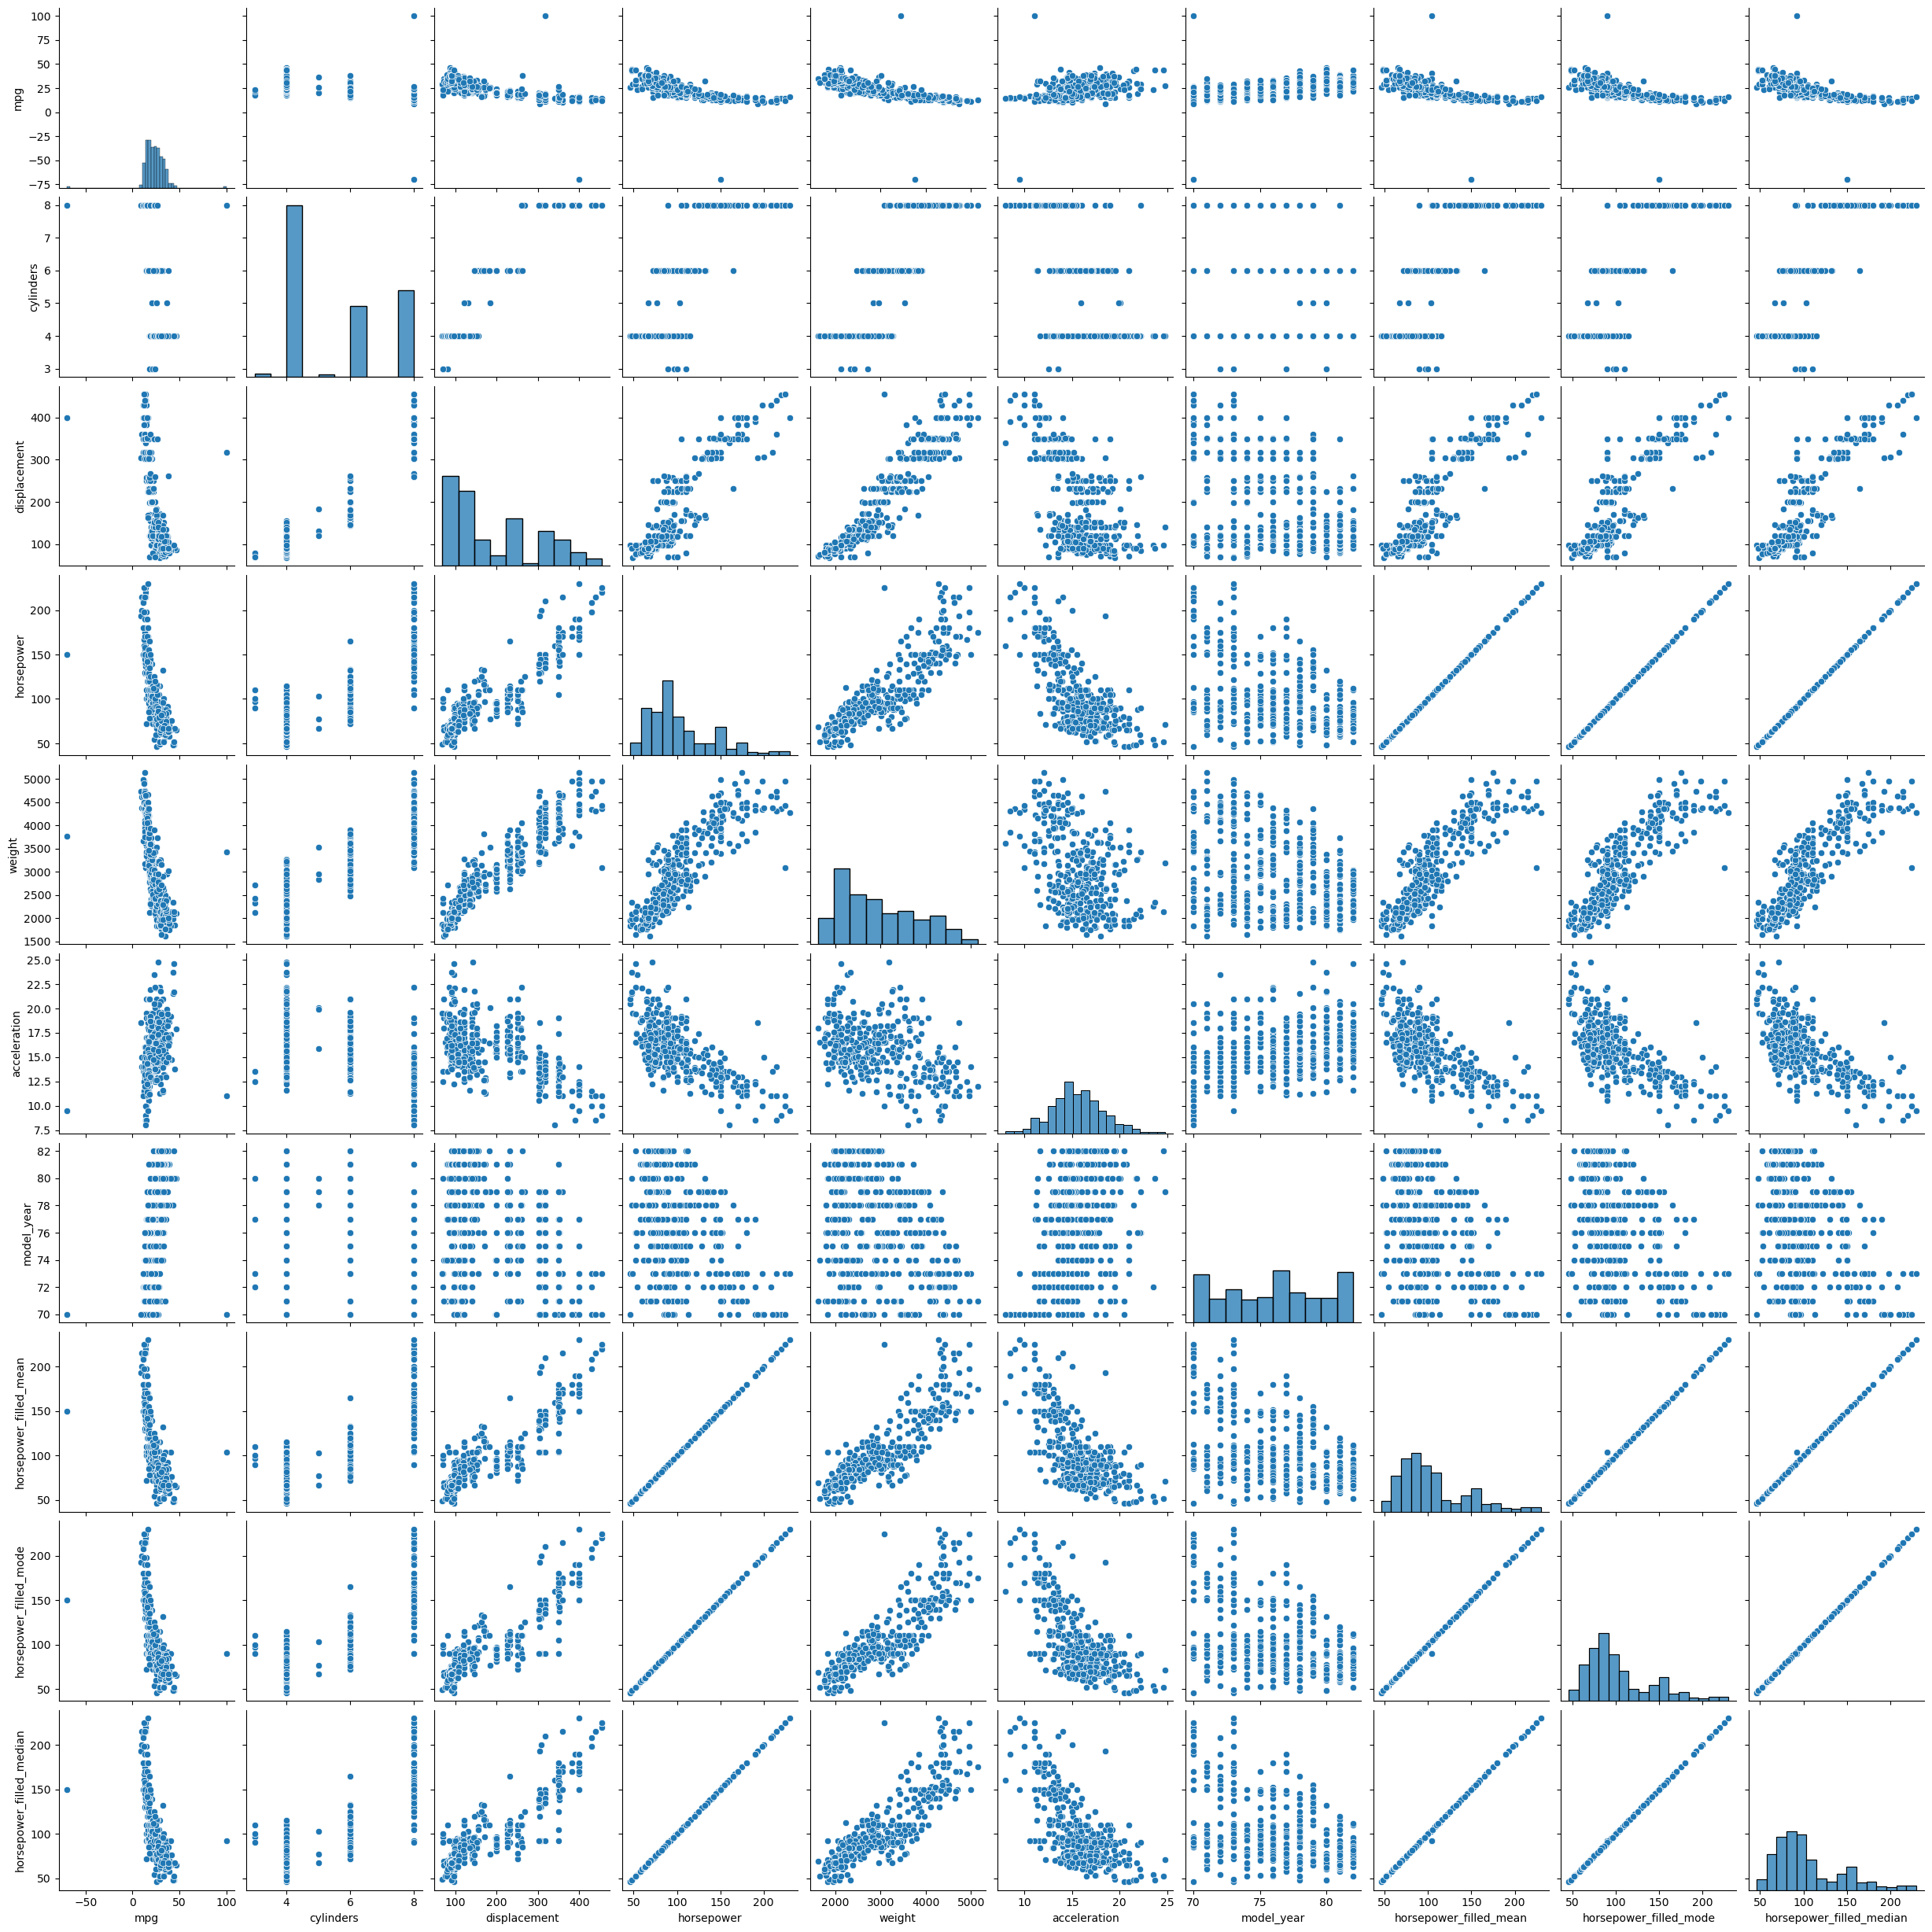

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)                          # pairplot : DataFrame 자료를 쌍으로 그려줌.
plt.show()

### 이상치 탐지
- 시각화를 통한 탐지(박스플롯, 산점도 등)
- 통계적 방법을 통한 탐지(Z-점수, IQR 등)

In [32]:
mpg_Q1 = df['mpg'].quantile(0.25)       # 1 분위 수 (Q1)
mpg_Q3 = df['mpg'].quantile(0.75)       # 3 분위 수 (Q3)
mpg_IQR = mpg_Q3 - mpg_Q1               
mpg_outliers = df[(df['mpg'] < mpg_Q1 - 1.5 * mpg_IQR) | (df['mpg'] > mpg_Q3 + 1.5 * mpg_IQR)]        # 하한선과 상한선을 구함
mpg_outliers                                                                                          # 이상치를 구하는 기준이 됨

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0
12,-70.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo,150.000000,150.0,150.0
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,65.000000,65.0,65.0


In [33]:
horsepower_Q1 = df['horsepower'].quantile(0.25)               # 위와 동일한 방법으로 구함
horsepower_Q3 = df['horsepower'].quantile(0.75)
horsepower_IQR = horsepower_Q3 - horsepower_Q1
horsepower_outliers = df[(df['horsepower'] < horsepower_Q1 - 1.5 * horsepower_IQR) | (df['horsepower'] > horsepower_Q3 + 1.5 * horsepower_IQR)]
horsepower_outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.0,198.0,198.0
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.0,220.0,220.0
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.0,215.0,215.0
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.0,225.0,225.0
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw),225.0,225.0,225.0
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,215.0,215.0,215.0
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20,200.0,200.0,200.0
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200,210.0,210.0,210.0
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d,193.0,193.0,193.0
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis,208.0,208.0,208.0


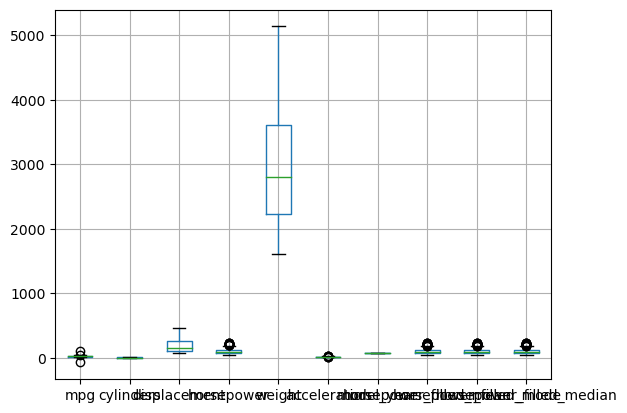

In [34]:
df.boxplot()
plt.show()                # 각 컬럼에 대한 boxplot 확인.
                          # 서로 다른 범위를 가진 자료들을 한 범위 안에 넣기 위해서 정규화를 진행한다~ 

In [35]:
columns=['mpg', 'horsepower', 'acceleration', 'horsepower_filled_mean', 'horsepower_filled_mode', 'horsepower_filled_median']

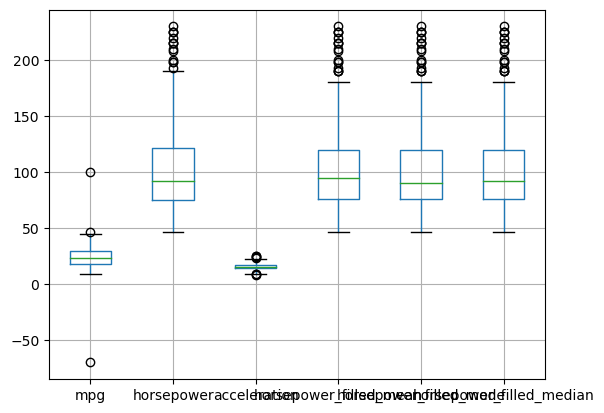

In [36]:
df.boxplot(column=columns)                # 보고 싶은 자료들만 출력하여 시각화
plt.show()

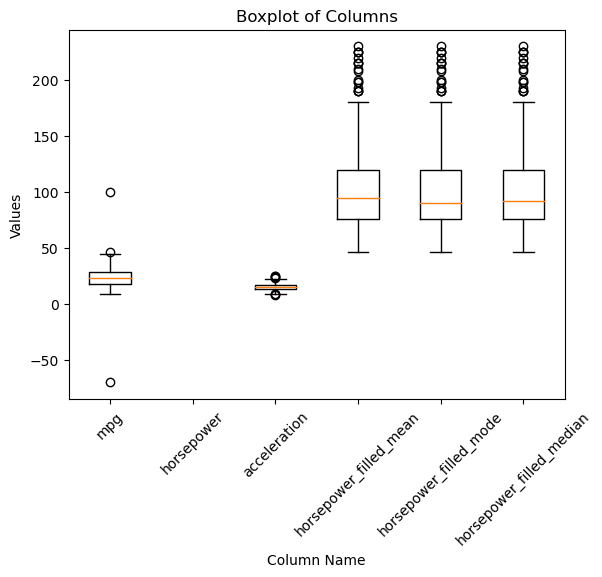

In [37]:
import matplotlib.pyplot as plt

# 여러 열을 선택하여 박스플롯 그리기
plt.boxplot(df[columns].values, labels=columns)    # labels 매개변수로 컬럼 이름 지정
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)                            # x축 레이블을 회전하여 겹치지 않게 함
plt.show()

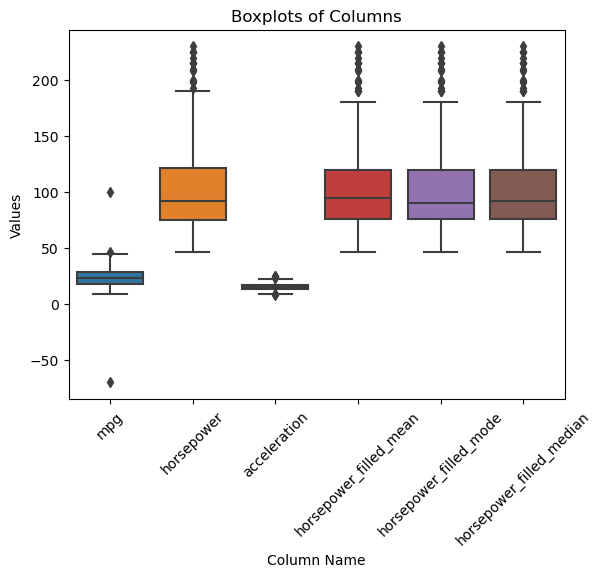

In [38]:
import seaborn as sns

# melt를 사용하여 long format으로 변경
melted_df = df.melt(value_vars=columns)

# 이제 seaborn에게 데이터 프레임을 알려주고, x는 variable, y는 value로 설정합니다.
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('Boxplots of Columns')
plt.xticks(rotation=45)  # x축 레이블을 회전하여 겹치지 않게 함
plt.show()

In [39]:
len(horsepower_outliers)

14

### 이상치 처리
- 제거/대체/변환/분리 등

In [40]:
# mpg의 이상치를 IQR을 이용하여 찾기
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['mpg'] < Q1 - 1.5 * IQR) | (df['mpg'] > Q3 + 1.5 * IQR)]
outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0
12,-70.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo,150.000000,150.0,150.0
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,65.000000,65.0,65.0


In [41]:
lower_bound = Q1 - 1.5 * IQR                           # 하한선 ,상한선을 구함
upper_bound = Q3 + 1.5 * IQR
print('lower_bound(최소):', lower_bound)
print('upper_bound(최대):', upper_bound)

lower_bound(최소): 0.25
upper_bound(최대): 46.25


In [42]:
# 이상치를 제외한 평균
df_tmp = df[(df['mpg'] >= lower_bound) & (df['mpg'] <= upper_bound)]    # 하한선보다 크고, 상한선보다 작은애들을 구함 (이상치를 제거)
mean = df_tmp['mpg'].mean()
mean

23.491645569620253

In [43]:
df['mpg_filled_with_mean'] = df['mpg']                                  # 이상치 값들이 평균값으로 들어감.
df.loc[(df['mpg'] < Q1 - 1.5 * IQR) | (df['mpg'] > Q3 + 1.5 * IQR), 'mpg_filled_with_mean'] = mean
df.head(13)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000


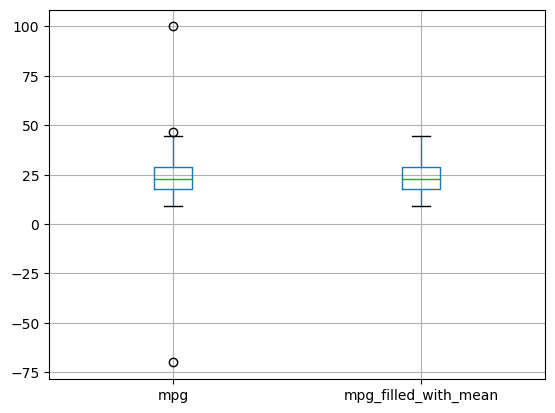

In [44]:
df.boxplot(column=['mpg', 'mpg_filled_with_mean'])
plt.show()

In [45]:
# 최빈값으로 이상치 대체한 새로운 컬럼 생성(넘파이 활용)

mode_value = df['mpg'].mode().iloc[0]
print('mpg 최빈값:', mode_value)
df['mpg_filled_with_mode'] = np.where(
    (df['mpg'] < lower_bound) | (df['mpg'] > upper_bound),
    mode_value,
    df['mpg']
)
df.head(13)

mpg 최빈값: 13.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000,15.0
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000,14.0
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000,14.0
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000,14.0
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000,15.0


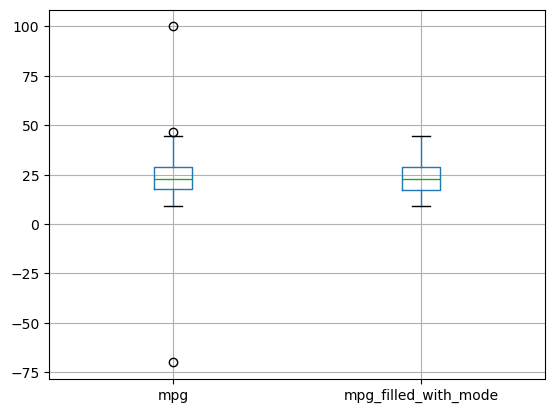

In [46]:
df.boxplot(column=['mpg', 'mpg_filled_with_mode'])
plt.show()

In [47]:
# 중간값으로 이상치 대체한 새로운 컬럼 생성                           # 이상치의 영향을 가장 적게 받는 것이 중간값

median_value = df['mpg'].median()
print('mpg 중앙값:', median_value)

df['mpg_filled_with_median'] = np.where(
    (df['mpg'] < lower_bound) | (df['mpg'] > upper_bound),
    median_value,
    df['mpg']
)

df.head(13)

mpg 중앙값: 23.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0,18.0
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0,15.0
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0,23.0
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0,16.0
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0,17.0
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000,15.0,15.0
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000,14.0,14.0
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000,14.0,14.0
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000,14.0,14.0
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000,15.0,15.0


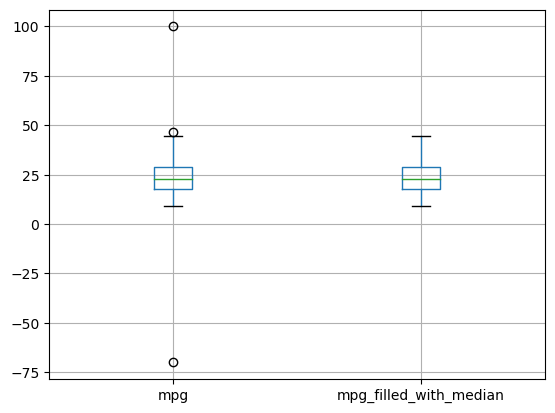

In [48]:
df.boxplot(column=['mpg', 'mpg_filled_with_median'])
plt.show()

In [49]:
# 최대값/최소값으로 이상치 대체한 새로운 컬럼 생성

max_value = df[(df['mpg'] <= upper_bound)]['mpg'].max()
min_value = df[(df['mpg'] >= lower_bound)]['mpg'].min()
print('최대값:', max_value)
print('최소값:', min_value)

df['mpg_filled_with_max_min'] = np.where(
    df['mpg'] > upper_bound,
    max_value,
    np.where(
        df['mpg'] < lower_bound, 
        min_value, 
        df['mpg']
        )
    )
df.head(13)

최대값: 44.6
최소값: 9.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median,mpg_filled_with_max_min
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0,18.0,18.0
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0,15.0,15.0
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0,23.0,44.6
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0,16.0,16.0
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0,17.0,17.0
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000,15.0,15.0,15.0
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000,14.0,14.0,14.0
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000,14.0,14.0,14.0
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000,14.0,14.0,14.0
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000,15.0,15.0,15.0


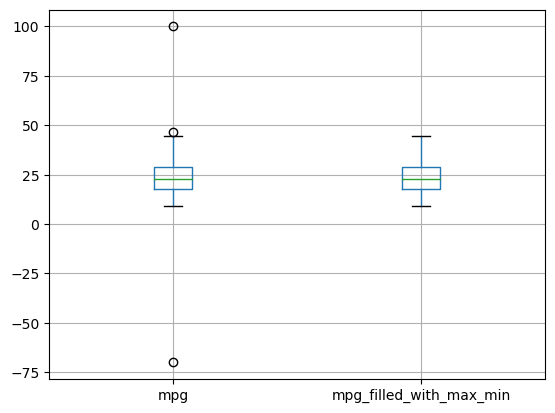

In [50]:
df.boxplot(column=['mpg', 'mpg_filled_with_max_min'])
plt.show()

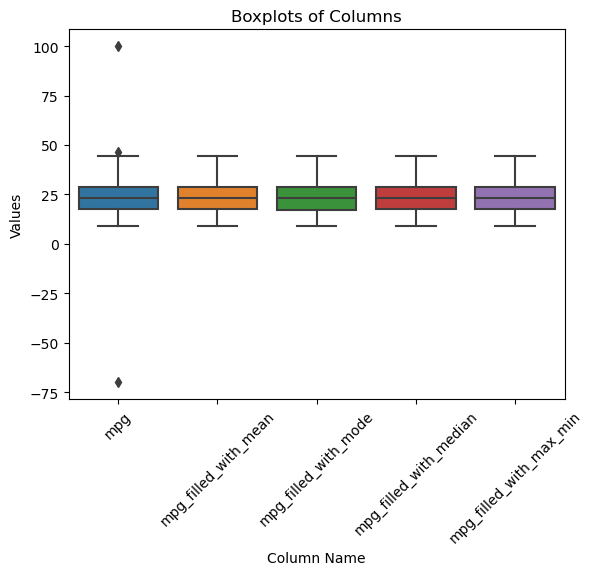

In [51]:
import seaborn as sns

# melt를 사용하여 long format으로 변경
melted_df = df.melt(value_vars=['mpg', 'mpg_filled_with_mean','mpg_filled_with_mode','mpg_filled_with_median','mpg_filled_with_max_min'])

                                             # 평균, 최빈, 중앙, 최소값으로 이상치들이 사라졌는지를 한번에 확인

# 이제 seaborn에게 데이터 프레임을 알려주고, x는 variable, y는 value로 설정합니다.
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('Boxplots of Columns')
plt.xticks(rotation=45)  # x축 레이블을 회전하여 겹치지 않게 함
plt.show()

#### horsepower컬럼의 결측치를 이용해서 만들어진 컬럼의 이상치를 확인하여 적절하게 처리하시오.

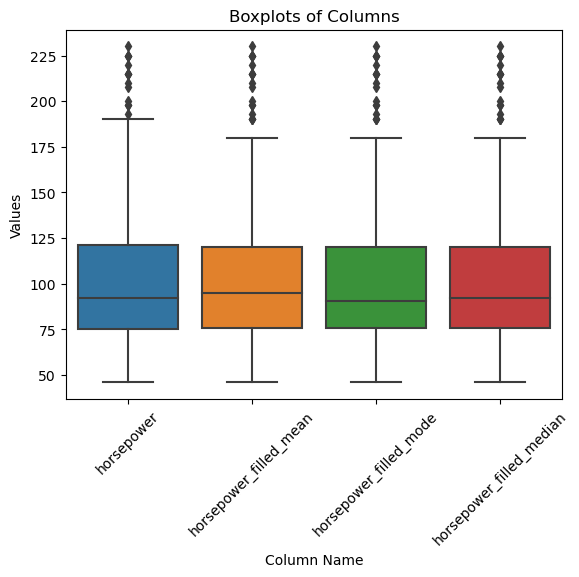

In [52]:
import seaborn as sns

# melt를 사용하여 long format으로 변경
melted_df = df.melt(value_vars=['horsepower', 'horsepower_filled_mean', 'horsepower_filled_mode', 'horsepower_filled_median'])

# 이제 seaborn에게 데이터 프레임을 알려주고, x는 variable, y는 value로 설정합니다.
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('Boxplots of Columns')
plt.xticks(rotation=45)  # x축 레이블을 회전하여 겹치지 않게 함
plt.show()

In [53]:
# 결측치 제외하고 이상치 개수 확인
# horsepower 컬럼 추출
horsepower = df['horsepower_filled_mean']

# Q1, Q3, IQR 계산
Q1 = horsepower.quantile(0.25)
Q3 = horsepower.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 조건
outlier_condition = (horsepower < lower_bound) | (horsepower > upper_bound)

# 이상치 개수 출력
print("Number of outliers:", outlier_condition.sum())

Number of outliers: 17


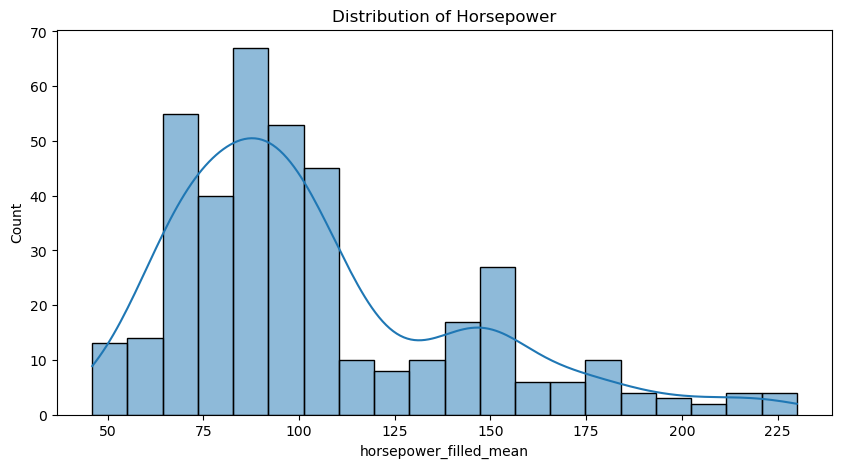

In [54]:
# horsepower 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램과 KDE 그래프 그리기
plt.figure(figsize=(10, 5))
sns.histplot(df['horsepower_filled_mean'], kde=True, bins=20)
plt.xlabel('horsepower_filled_mean')
plt.ylabel('Count')
plt.title('Distribution of Horsepower')
plt.show()

In [55]:
# 평균값으로 이상치를 대체한 새로운 컬럼 생성                         # 평균을 이용하면 왼쪽으로 치우칠 수 있겠다~ 를 인지할 수 있음.

mean_value = df['horsepower_filled_mean'].mean()
print('horsepower_filled_mean 평균값:', mean_value)

df['horsepower_filled_mean2'] = np.where(
    (df['horsepower_filled_mean'] < lower_bound) | (df['horsepower_filled_mean'] > upper_bound),
    mean_value,
    df['horsepower_filled_mean']
)
                                                                      # 이상치를 모두 평균값으로 변경
df.head(15)

horsepower_filled_mean 평균값: 103.91989664082686


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median,mpg_filled_with_max_min,horsepower_filled_mean2
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0,18.0,18.0,103.919897
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0,15.0,15.0,103.919897
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0,23.0,44.6,103.919897
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0,16.0,16.0,103.919897
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0,17.0,17.0,103.919897
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000,15.0,15.0,15.0,103.919897
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000,14.0,14.0,14.0,103.919897
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000,14.0,14.0,14.0,103.919897
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000,14.0,14.0,14.0,103.919897
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000,15.0,15.0,15.0,103.919897


In [56]:
# 결측치 제외하고 이상치 개수 확인
# horsepower 컬럼 추출
horsepower = df['horsepower_filled_mean2'].dropna() # 결측치 제거

# 이상치 조건
outlier_condition = (horsepower < lower_bound) | (horsepower > upper_bound)

# 이상치 개수 출력
print("Number of outliers:", outlier_condition.sum())                           # 이상치가 모두 없어짐을 확인.

Number of outliers: 0


### 데이터 스케일링 및 정규화
- StandardScaler, MinMaxScaler 등을 사용하여 데이터 스케일링을 수행

In [57]:
df['horsepower_filled_mean2'].head(13)

0     103.919897
1     103.919897
2     103.919897
3     103.919897
4     103.919897
5     103.919897
6     103.919897
7     103.919897
8     103.919897
9     103.919897
10    170.000000
11    160.000000
12    150.000000
Name: horsepower_filled_mean2, dtype: float64

In [58]:
from sklearn.preprocessing import StandardScaler
  
# 표준화                                        # StandardScaler() : 데이터 범위가 있을 때 표준편차 0 기준으로 값들을 분배
scaler = StandardScaler()                                        
scaler.fit_transform(df[['horsepower_filled_mean2']].dropna())[:13]

array([[0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [0.14632967],
       [2.30794261],
       [1.98082252],
       [1.65370243]])

In [59]:
scaler.fit_transform(df[['horsepower_filled_mean2']].dropna()).shape

(398, 1)

In [60]:
df['displacement'].head()

0    307.0
1    350.0
2    318.0
3    304.0
4    302.0
Name: displacement, dtype: float64

In [61]:
from sklearn.preprocessing import MinMaxScaler

# 정규화                                                # MinMaxScaler() : 0 ~ 1 사이의 범위로 값을 넣어준다.
scaler = MinMaxScaler()
scaler.fit_transform(df[['displacement']])[:10]

array([[0.61757106],
       [0.72868217],
       [0.64599483],
       [0.60981912],
       [0.60465116],
       [0.93281654],
       [0.99741602],
       [0.96124031],
       [1.        ],
       [0.83204134]])

### Feature Engineering
- 새로운 feature를 생성하거나 기존 feature를 변형하여 모델의 성능을 향상

In [62]:
from sklearn.preprocessing import StandardScaler

# 표준화
scaler = StandardScaler()

# horsepower_filled_mean을 표준화 하여 std_horsepower열로 추가
df['std_horsepower'] = pd.DataFrame(                                        # 표준화된 데이터 컬럼을 추가
    scaler.fit_transform(df[['horsepower_filled_mean2']].dropna()),
    index=df.index[df['horsepower_filled_mean2'].notna()]
)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median,mpg_filled_with_max_min,horsepower_filled_mean2,std_horsepower
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0,18.0,18.0,103.919897,0.14633
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0,15.0,15.0,103.919897,0.14633
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0,23.0,44.6,103.919897,0.14633
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0,16.0,16.0,103.919897,0.14633
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0,17.0,17.0,103.919897,0.14633
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000,15.0,15.0,15.0,103.919897,0.14633
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000,14.0,14.0,14.0,103.919897,0.14633
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000,14.0,14.0,14.0,103.919897,0.14633
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000,14.0,14.0,14.0,103.919897,0.14633
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000,15.0,15.0,15.0,103.919897,0.14633


In [63]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()

# displacement을 표준화 하여 normal_displacement열로 추가
df['normal_displacement'] = pd.DataFrame(
    scaler.fit_transform(df[['displacement']])
)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median,mpg_filled_with_max_min,horsepower_filled_mean2,std_horsepower,normal_displacement
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0,18.0,18.0,103.919897,0.14633,0.617571
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0,15.0,15.0,103.919897,0.14633,0.728682
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0,23.0,44.6,103.919897,0.14633,0.645995
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0,16.0,16.0,103.919897,0.14633,0.609819
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0,17.0,17.0,103.919897,0.14633,0.604651
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,198.000000,198.0,198.0,15.000000,15.0,15.0,15.0,103.919897,0.14633,0.932817
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,220.000000,220.0,220.0,14.000000,14.0,14.0,14.0,103.919897,0.14633,0.997416
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,215.000000,215.0,215.0,14.000000,14.0,14.0,14.0,103.919897,0.14633,0.961240
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,225.000000,225.0,225.0,14.000000,14.0,14.0,14.0,103.919897,0.14633,1.000000
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,190.000000,190.0,190.0,15.000000,15.0,15.0,15.0,103.919897,0.14633,0.832041


- origin(제조국가)을 One-Hot Encoding 적용

In [64]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [65]:
# 원-핫 인코딩 수행
df_encoded = pd.get_dummies(df, columns=['origin'])         # 컬럼을 선택하고 .get_dummies로 원핫인코딩을 실행 -> 컬럼 3개가 추가됨.
df_encoded

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,horsepower_filled_mean,horsepower_filled_mode,...,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median,mpg_filled_with_max_min,horsepower_filled_mean2,std_horsepower,normal_displacement,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,NaN,3504,12.0,70,chevrolet chevelle malibu,103.919897,90.0,...,18.000000,18.0,18.0,18.0,103.919897,0.146330,0.617571,0,0,1
1,15.0,8,350.0,NaN,3693,11.5,70,buick skylark 320,103.919897,90.0,...,15.000000,15.0,15.0,15.0,103.919897,0.146330,0.728682,0,0,1
2,100.0,8,318.0,NaN,3436,11.0,70,plymouth satellite,103.919897,90.0,...,23.491646,13.0,23.0,44.6,103.919897,0.146330,0.645995,0,0,1
3,16.0,8,304.0,NaN,3433,12.0,70,amc rebel sst,103.919897,90.0,...,16.000000,16.0,16.0,16.0,103.919897,0.146330,0.609819,0,0,1
4,17.0,8,302.0,NaN,3449,10.5,70,ford torino,103.919897,90.0,...,17.000000,17.0,17.0,17.0,103.919897,0.146330,0.604651,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,86.000000,86.0,...,27.000000,27.0,27.0,27.0,86.000000,-0.439866,0.186047,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,52.000000,52.0,...,44.000000,44.0,44.0,44.0,52.000000,-1.552074,0.074935,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,84.000000,84.0,...,32.000000,32.0,32.0,32.0,84.000000,-0.505290,0.173127,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,79.000000,79.0,...,28.000000,28.0,28.0,28.0,79.000000,-0.668850,0.134367,0,0,1


### 종속 변수와 독립 변수 파악하기
- 분석 목적에 맞게 사용할 종속 변수와 독립 변수를 선택

In [66]:
df_encoded.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'horsepower_filled_mean',
       'horsepower_filled_mode', 'horsepower_filled_median',
       'mpg_filled_with_mean', 'mpg_filled_with_mode',
       'mpg_filled_with_median', 'mpg_filled_with_max_min',
       'horsepower_filled_mean2', 'std_horsepower', 'normal_displacement',
       'origin_europe', 'origin_japan', 'origin_usa'],
      dtype='object')

In [67]:
columns = ['mpg_filled_with_mean', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 
        'std_horsepower', 'normal_displacement', 
        'origin_europe', 'origin_japan', 'origin_usa']

In [68]:
# 상관계수 확인
df_encoded = df_encoded[columns]
df_encoded[columns].corr()

,mpg_filled_with_mean,cylinders,displacement,weight,acceleration,model_year,std_horsepower,normal_displacement,origin_europe,origin_japan,origin_usa
mpg_filled_with_mean,1.000000,-0.772481,-0.799548,-0.831624,0.410456,0.571450,-0.744692,-0.799548,0.263862,0.430673,-0.562520
cylinders,-0.772481,1.000000,0.950721,0.896017,-0.505419,-0.348746,0.801423,0.950721,-0.352861,-0.396479,0.604351
displacement,-0.799548,0.950721,1.000000,0.932824,-0.543684,-0.370164,0.794080,1.000000,-0.373886,-0.433505,0.651407
weight,-0.831624,0.896017,0.932824,1.000000,-0.417457,-0.306564,0.816765,0.932824,-0.298843,-0.440817,0.598398
acceleration,0.410456,-0.505419,-0.543684,-0.417457,1.000000,0.288137,-0.604882,-0.543684,0.204473,0.109144,-0.250806
model_year,0.571450,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.299010,-0.370164,-0.024489,0.193101,-0.139883
std_horsepower,-0.744692,0.801423,0.794080,0.816765,-0.604882,-0.299010,1.000000,0.794080,-0.275344,-0.319249,0.479720
normal_displacement,-0.799548,0.950721,1.000000,0.932824,-0.543684,-0.370164,0.794080,1.000000,-0.373886,-0.433505,0.651407
origin_europe,0.263862,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,-0.275344,-0.373886,1.000000,-0.229895,-0.597198
origin_japan,0.430673,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.319249,-0.433505,-0.229895,1.000000,-0.643317


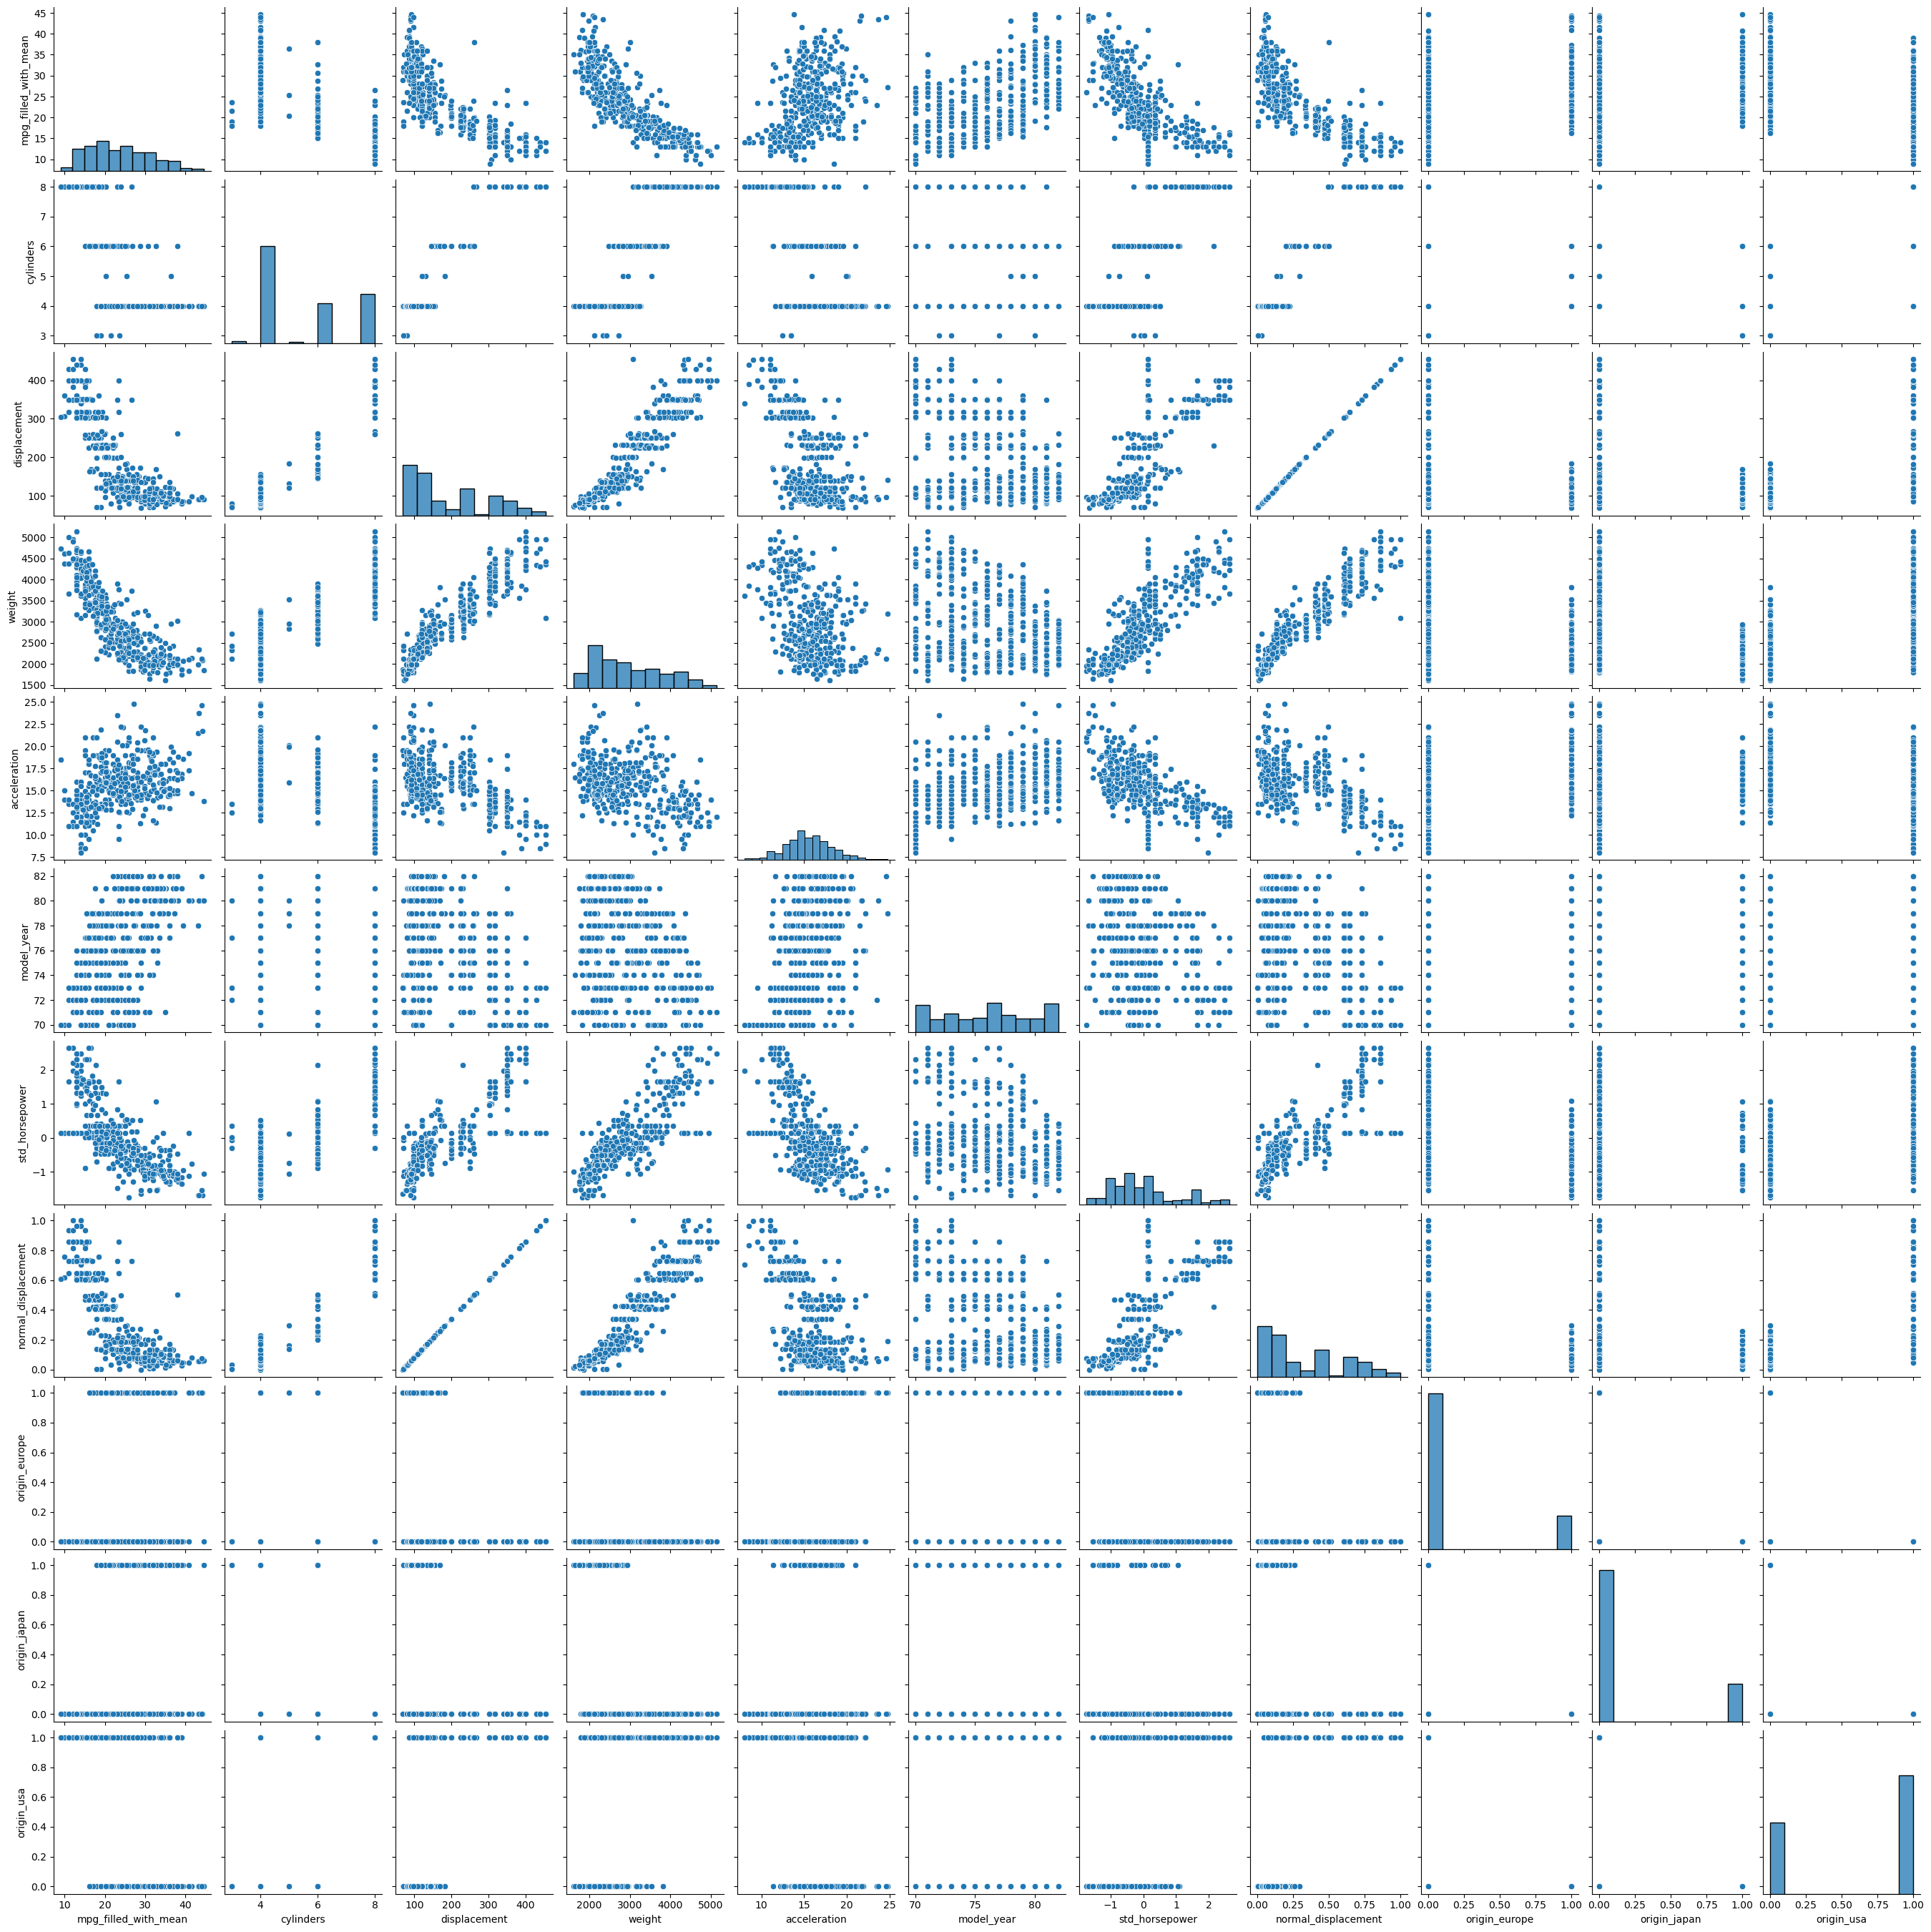

In [69]:
# 시각화하여 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_encoded)
plt.show()

In [70]:
# 독립변수와 종속변수 선택
X = df_encoded.drop('mpg_filled_with_mean', axis=1)   # 독립변수들
y = df_encoded['mpg_filled_with_mean']                # 종속변수 (mpg)

In [71]:
X.head()

,cylinders,displacement,weight,acceleration,model_year,std_horsepower,normal_displacement,origin_europe,origin_japan,origin_usa
0,8,307.0,3504,12.0,70,0.14633,0.617571,0,0,1
1,8,350.0,3693,11.5,70,0.14633,0.728682,0,0,1
2,8,318.0,3436,11.0,70,0.14633,0.645995,0,0,1
3,8,304.0,3433,12.0,70,0.14633,0.609819,0,0,1
4,8,302.0,3449,10.5,70,0.14633,0.604651,0,0,1


In [72]:
y.head()

0    18.000000
1    15.000000
2    23.491646
3    16.000000
4    17.000000
Name: mpg_filled_with_mean, dtype: float64

### 데이터 분할
- train_test_split을 사용하여 데이터를 학습 데이터와 테스트 데이터로 분할

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)        # test_size=0.2 : 사이즈 비율 20%로 


# train_test_split(test_size=0.2)
# 위의 80%는 훈련용 (train) , 아래 20%는 테스트용 (test)
# train 값으로 독립변수(x_train), 종속변수(y_train)의 값을 모델로 보낸 후 모델에서 그 값들을 확인.
# 20% 에 해당하는 test(x_test) 값으로 위의 값들에 대해 결과를 도출(예측). --> 그 값을 y 종속변수(y_test) 20%의 값과 비교.
# 결과에서 비교한 값들이 차이가 너무 크면 모델을 수정, 값들이 비슷하면 그 모델을 사용

In [74]:
X_train.shape, X_test.shape

((318, 10), (80, 10))

In [75]:
y_train.shape,y_test.shape

((318,), (80,))

## 선형회귀 분석

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred_train = model.predict(X_train)            # 훈련데이터에 대한 예측
y_pred_test = model.predict(X_test)              # 테스트데이터에 대한 예측

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# R-squared (R²)                               # 선형회귀 분석에서 모델이 잘 판단했는지 확인하는 척도 (추세를 예측)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 출력
print(f"score: {model.score(X_test, y_test)}")
print(f"Training Mean Squared Error(MSE): {mse_train}")
print(f"Testing Mean Squared Error(MSE): {mse_test}")
print(f"Training Root Mean Squared Error(RMSE): {rmse_train}")
print(f"Testing Root Mean Squared Error(RMSE): {rmse_test}")
print(f"Training Mean Absolute Error(MAE): {mae_train}")
print(f"Testing Mean Absolute Error(MAE): {mae_test}")
print(f"Training R-squared(R^2): {r2_train}")
print(f"Testing R-squared(R^2): {r2_test}")

score: 0.859811436408501
Training Mean Squared Error(MSE): 11.193152527719876
Testing Mean Squared Error(MSE): 7.537440518735633
Training Root Mean Squared Error(RMSE): 3.345616912875692
Testing Root Mean Squared Error(RMSE): 2.7454399499416544
Training Mean Absolute Error(MAE): 2.561139409348156
Testing Mean Absolute Error(MAE): 2.0813459193926525
Training R-squared(R^2): 0.8156026390789587
Testing R-squared(R^2): 0.859811436408501


##### Mean Squared Error (MSE): 
- 이 값은 예측값과 실제값 사이의 차이를 제곱한 값들의 평균
- MSE가 낮을수록 모델이 더 정확하다고 할 수 있음
- 하지만 MSE는 오류를 제곱하기 때문에, 이상치에 민감하게 반응할 수 있음

##### Root Mean Squared Error (RMSE): 
- 이 값은 MSE의 제곱근이며, 모델의 평균 오차를 나타냄
- RMSE도 낮을수록 좋음
- RMSE는 모델의 오차를 원래 단위로 다시 돌려놓아 이해하기 쉬움

##### Mean Absolute Error (MAE): 
- 이 값은 예측값과 실제값 사이의 차이의 절댓값을 취한 후, 이들을 평균한 값
- MAE는 MSE나 RMSE에 비해 이상치에 덜 민감
- 낮은 값이 더 좋습니다.

##### R-squared (R²): 
- 이 값은 결정 계수로 불리며, 모델이 데이터를 얼마나 잘 설명하는지 나타내는 지표
- R² 값은 0과 1 사이의 값으로, 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 의미

#### 훈련 데이터와 테스트 데이터 각각에 대한 값들이 출력되는데, 일반적으로 훈련 데이터에서의 점수가 더 높게 나오는 경우가 많음. 그러나 이 경우에도 과적합을 조심해야 함. 훈련 데이터에 대한 점수와 테스트 데이터에 대한 점수 사이에 큰 차이가 있다면, 모델이 훈련 데이터에 과적합되었을 가능성이 있음

#### 각 지표들을 종합적으로 해석하여 모델의 성능을 판단
#### R²가 높고, MSE, RMSE, MAE가 낮을수록 좋은 모델이라고 할 수 있습니다.

#### 상관관계가 작은 컬럼을 제외하고 다시 테스트

In [77]:
columns = ['cylinders', 'std_horsepower', 'weight']

X = X[columns]
X

,cylinders,std_horsepower,weight
0,8,0.146330,3504
1,8,0.146330,3693
2,8,0.146330,3436
3,8,0.146330,3433
4,8,0.146330,3449
...,...,...,...
393,4,-0.439866,2790
394,4,-1.552074,2130
395,4,-0.505290,2295
396,4,-0.668850,2625


In [78]:
X['mpg_filled_with_mean'] = y
X.corr()

,cylinders,std_horsepower,weight,mpg_filled_with_mean
cylinders,1.000000,0.801423,0.896017,-0.772481
std_horsepower,0.801423,1.000000,0.816765,-0.744692
weight,0.896017,0.816765,1.000000,-0.831624
mpg_filled_with_mean,-0.772481,-0.744692,-0.831624,1.000000


In [79]:
X = X.drop('mpg_filled_with_mean', axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# R-squared (R²)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 출력
print(f"score: {model.score(X_test, y_test)}")
print(f"Training Mean Squared Error(MSE): {mse_train}")
print(f"Testing Mean Squared Error(MSE): {mse_test}")
print(f"Training Root Mean Squared Error(RMSE): {rmse_train}")
print(f"Testing Root Mean Squared Error(RMSE): {rmse_test}")
print(f"Training Mean Absolute Error(MAE): {mae_train}")
print(f"Testing Mean Absolute Error(MAE): {mae_test}")
print(f"Training R-squared(R^2): {r2_train}")
print(f"Testing R-squared(R^2): {r2_test}")

score: 0.7444926972780868
Training Mean Squared Error(MSE): 18.429460398828276
Testing Mean Squared Error(MSE): 13.737719019511967
Training Root Mean Squared Error(RMSE): 4.292954739899813
Testing Root Mean Squared Error(RMSE): 3.7064429065496163
Training Mean Absolute Error(MAE): 3.298504267222343
Testing Mean Absolute Error(MAE): 2.985814948927406
Training R-squared(R^2): 0.6963908199833098
Testing R-squared(R^2): 0.7444926972780868


### 예측 해보기

In [82]:
X_test[:3]

,cylinders,std_horsepower,weight
198,4,-1.519362,1795
396,4,-0.668850,2625
33,6,0.018102,2634


In [83]:
# 훈련 데이터의 특성 이름 가져오기
feature_names = model.feature_names_in_

# 예측할 데이터
sample_data = [
    [4, -1.519362, 1795],
    [4, -0.668850, 2625],
    [6, 0.018102, 2634],
]

# 데이터프레임으로 변환하고 특성 이름 할당
sample_data_df = pd.DataFrame(sample_data, columns=feature_names)
sample_data_df

,cylinders,std_horsepower,weight
0,4,-1.519362,1795
1,4,-0.668850,2625
2,6,0.018102,2634


In [84]:
# 예측 하기
print(model.predict(sample_data_df))

[32.84934996 26.941533   25.25772957]


In [85]:
y_test[:3]

198    33.0
396    28.0
33     19.0
Name: mpg_filled_with_mean, dtype: float64

In [86]:
# 전처리 적용한 결과 데이터프레임 확인
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_filled_mean,horsepower_filled_mode,horsepower_filled_median,mpg_filled_with_mean,mpg_filled_with_mode,mpg_filled_with_median,mpg_filled_with_max_min,horsepower_filled_mean2,std_horsepower,normal_displacement
0,18.0,8,307.0,NaN,3504,12.0,70,usa,chevrolet chevelle malibu,103.919897,90.0,92.0,18.000000,18.0,18.0,18.0,103.919897,0.146330,0.617571
1,15.0,8,350.0,NaN,3693,11.5,70,usa,buick skylark 320,103.919897,90.0,92.0,15.000000,15.0,15.0,15.0,103.919897,0.146330,0.728682
2,100.0,8,318.0,NaN,3436,11.0,70,usa,plymouth satellite,103.919897,90.0,92.0,23.491646,13.0,23.0,44.6,103.919897,0.146330,0.645995
3,16.0,8,304.0,NaN,3433,12.0,70,usa,amc rebel sst,103.919897,90.0,92.0,16.000000,16.0,16.0,16.0,103.919897,0.146330,0.609819
4,17.0,8,302.0,NaN,3449,10.5,70,usa,ford torino,103.919897,90.0,92.0,17.000000,17.0,17.0,17.0,103.919897,0.146330,0.604651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,86.000000,86.0,86.0,27.000000,27.0,27.0,27.0,86.000000,-0.439866,0.186047
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,52.000000,52.0,52.0,44.000000,44.0,44.0,44.0,52.000000,-1.552074,0.074935
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,84.000000,84.0,84.0,32.000000,32.0,32.0,32.0,84.000000,-0.505290,0.173127
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,79.000000,79.0,79.0,28.000000,28.0,28.0,28.0,79.000000,-0.668850,0.134367


In [87]:
# csv파일로 저장
df.to_csv('pre_mpg.csv', index=False)